# **Modelo Predictivo de Bitcoin**

## Importando Librerias





In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Lectura del DataFrame

In [90]:
df_original = pd.read_csv("/content/BTCUSD_1m_Binance.csv")
df = df_original.copy()
df

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,2017-08-17 04:00:59.999,7.564907e+03,3.0,0.075183,320.390851,0.0
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,2017-08-17 04:01:59.999,0.000000e+00,0.0,0.000000,0.000000,0.0
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,2017-08-17 04:02:59.999,1.117543e+03,2.0,0.261074,1117.542921,0.0
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,2017-08-17 04:03:59.999,5.117185e+01,3.0,0.012008,51.171852,0.0
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,2017-08-17 04:04:59.999,5.999993e+02,1.0,0.140796,599.999338,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4134030,2025-07-03 00:22:00,108780.76,108780.76,108719.99,108758.56,12.387770,2025-07-03 00:22:59.999,1.347044e+06,2991.0,4.919940,534960.361089,0.0
4134031,2025-07-03 00:23:00,108758.55,108780.77,108715.56,108780.77,5.708540,2025-07-03 00:23:59.999,6.207653e+05,2947.0,3.189530,346832.454188,0.0
4134032,2025-07-03 00:24:00,108780.77,108848.00,108780.76,108803.75,12.433200,2025-07-03 00:24:59.999,1.352683e+06,2997.0,3.475340,378140.946278,0.0
4134033,2025-07-03 00:25:00,108803.75,108803.75,108751.43,108751.44,1.907680,2025-07-03 00:25:59.999,2.075158e+05,1692.0,0.289230,31467.136108,0.0


## Análisis exploratorio de los datos

In [91]:
#Verificando cantidad de datos nulos
df.isnull().sum()

,0
Open time,0
Open,0
High,0
Low,0
Close,0
Volume,0
Close time,0
Quote asset volume,0
Number of trades,0
Taker buy base asset volume,0


In [92]:
#Verificando cantidad de datos duplicados
df.duplicated().sum()

np.int64(0)

In [93]:
# Descripcion Estadistica
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,4134035.0,3.143906e+04,2.729691e+04,2830.0,8824.020000,22903.650000,4.697804e+04,1.119241e+05
High,4134035.0,3.145422e+04,2.730663e+04,2830.0,8830.000000,22915.310000,4.700612e+04,1.119800e+05
Low,4134035.0,3.142376e+04,2.728716e+04,2817.0,8818.075000,22891.700000,4.694897e+04,1.119153e+05
Close,4134035.0,3.143907e+04,2.729694e+04,2817.0,8824.045000,22903.470000,4.697805e+04,1.119241e+05
Volume,4134035.0,4.544916e+01,8.806530e+01,0.0,9.233867,20.157690,4.522490e+01,5.877775e+03
Quote asset volume,4134035.0,1.221976e+06,2.379428e+06,0.0,148188.276311,473964.121179,1.358431e+06,2.598501e+08
Number of trades,4134035.0,1.223968e+03,2.038462e+03,0.0,203.000000,538.000000,1.319000e+03,1.497130e+05
Taker buy base asset volume,4134035.0,2.258403e+01,4.491545e+01,0.0,4.060270,9.631230,2.257431e+01,3.537453e+03
Taker buy quote asset volume,4134035.0,6.043300e+05,1.238658e+06,0.0,62793.159716,215310.778929,6.604329e+05,1.482314e+08
Ignore,4134035.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00


In [94]:
# Columnas del dataset
df.columns

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Ignore'],
      dtype='object')

In [95]:
# Tamaño del dataset
df.shape

(4134035, 12)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4134035 entries, 0 to 4134034
Data columns (total 12 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Open time                     object 
 1   Open                          float64
 2   High                          float64
 3   Low                           float64
 4   Close                         float64
 5   Volume                        float64
 6   Close time                    object 
 7   Quote asset volume            float64
 8   Number of trades              float64
 9   Taker buy base asset volume   float64
 10  Taker buy quote asset volume  float64
 11  Ignore                        float64
dtypes: float64(10), object(2)
memory usage: 378.5+ MB


## Limpieza de datos

Eliminación de columnas innecesarias

In [97]:
df.drop(columns=["Ignore", "Close time"], inplace=True)
df.columns

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume'],
      dtype='object')

### Creación y conversión de datos en nuevas columnas (date y hour)

In [98]:
# Convertir a datetime
df["Datetime"] = pd.to_datetime(df["Open time"])

# Extraer fecha y hora
df["Date"] = df["Datetime"].dt.date
df["Hour"] = df["Datetime"].dt.hour

# Convertir Date a datetime64
df["Date"] = pd.to_datetime(df["Date"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4134035 entries, 0 to 4134034
Data columns (total 13 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Open time                     object        
 1   Open                          float64       
 2   High                          float64       
 3   Low                           float64       
 4   Close                         float64       
 5   Volume                        float64       
 6   Quote asset volume            float64       
 7   Number of trades              float64       
 8   Taker buy base asset volume   float64       
 9   Taker buy quote asset volume  float64       
 10  Datetime                      datetime64[ns]
 11  Date                          datetime64[ns]
 12  Hour                          int32         
dtypes: datetime64[ns](2), float64(9), int32(1), object(1)
memory usage: 394.3+ MB


### Límite de registros

El dataset se está actualizando constantemente, por lo que esto es una medida de estandarización para evaluar los resultados

In [99]:
df = df[df['Date'] <= pd.Timestamp(dt.date(year=2025, month=6, day=30))]

In [100]:
df

,Open time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Datetime,Date,Hour
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7.564907e+03,3.0,0.075183,3.203909e+02,2017-08-17 04:00:00,2017-08-17,4
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000e+00,0.0,0.000000,0.000000e+00,2017-08-17 04:01:00,2017-08-17,4
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1.117543e+03,2.0,0.261074,1.117543e+03,2017-08-17 04:02:00,2017-08-17,4
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,5.117185e+01,3.0,0.012008,5.117185e+01,2017-08-17 04:03:00,2017-08-17,4
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,5.999993e+02,1.0,0.140796,5.999993e+02,2017-08-17 04:04:00,2017-08-17,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131123,2025-06-30 23:55:00,107104.12,107104.12,107093.34,107093.34,1.489080,1.594723e+05,370.0,1.046640,1.120883e+05,2025-06-30 23:55:00,2025-06-30,23
4131124,2025-06-30 23:56:00,107093.35,107093.35,107071.64,107071.65,1.729470,1.852058e+05,591.0,0.200040,2.142194e+04,2025-06-30 23:56:00,2025-06-30,23
4131125,2025-06-30 23:57:00,107071.64,107086.00,107071.64,107085.99,5.136420,5.500011e+05,516.0,2.935670,3.143323e+05,2025-06-30 23:57:00,2025-06-30,23
4131126,2025-06-30 23:58:00,107085.99,107140.00,107085.99,107139.99,14.187840,1.519565e+06,2001.0,13.914420,1.490284e+06,2025-06-30 23:58:00,2025-06-30,23


### Reducciendo columnas y agrupando por día y hora

In [101]:
# Agrupar por Date y Hour
df_hora = df.groupby(["Date", "Hour"])[["Open", "High", "Low", "Close"]].mean()

# Agregar columnas con suma
df_hora["Volume"] = df.groupby(["Date", "Hour"])["Volume"].sum()
df_hora["Quote asset volume"] = df.groupby(["Date", "Hour"])["Quote asset volume"].sum()
df_hora["Number of trades"] = df.groupby(["Date", "Hour"])["Number of trades"].sum()
df_hora["Taker buy base asset volume"] = df.groupby(["Date", "Hour"])["Taker buy base asset volume"].sum()
df_hora["Taker buy quote asset volume"] = df.groupby(["Date", "Hour"])["Taker buy quote asset volume"].sum()

# Resetear índice
df_hora = df_hora.reset_index()

df_hora

,Date,Hour,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,2017-08-17,4,4282.443667,4283.535667,4281.556333,4282.625167,47.181009,2.023661e+05,171.0,35.160503,1.509525e+05
1,2017-08-17,5,4313.180667,4313.642500,4312.843833,4313.305667,23.234916,1.003048e+05,102.0,21.448071,9.260828e+04
2,2017-08-17,6,4326.450167,4327.375833,4326.350667,4327.276333,7.229691,3.128231e+04,36.0,4.802861,2.079532e+04
3,2017-08-17,7,4310.706833,4311.151000,4310.593833,4311.038000,4.443249,1.924106e+04,25.0,2.602292,1.129135e+04
4,2017-08-17,8,4360.839667,4361.117500,4360.097500,4360.375333,0.972807,4.239504e+03,28.0,0.814655,3.552747e+03
...,...,...,...,...,...,...,...,...,...,...,...
68863,2025-06-30,19,107458.975833,107479.450333,107446.760667,107467.366333,325.038380,3.494657e+07,71715.0,194.530860,2.091631e+07
68864,2025-06-30,20,107597.273500,107606.758000,107583.732500,107594.471000,187.168190,2.013920e+07,49798.0,81.445960,8.763359e+06
68865,2025-06-30,21,107370.565500,107380.719667,107352.140000,107363.107667,441.728720,4.737217e+07,61097.0,114.763930,1.230459e+07
68866,2025-06-30,22,107214.892500,107227.701833,107200.199833,107214.589167,203.265000,2.178984e+07,59272.0,101.822900,1.091597e+07


In [102]:
df_hora["Datetime"] = pd.to_datetime(df_hora["Date"]) + pd.to_timedelta(df_hora["Hour"], unit="h")
df_hora.set_index("Datetime", inplace=True)
df_hora

,Date,Hour,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
Datetime,,,,,,,,,,,
2017-08-17 04:00:00,2017-08-17,4,4282.443667,4283.535667,4281.556333,4282.625167,47.181009,2.023661e+05,171.0,35.160503,1.509525e+05
2017-08-17 05:00:00,2017-08-17,5,4313.180667,4313.642500,4312.843833,4313.305667,23.234916,1.003048e+05,102.0,21.448071,9.260828e+04
2017-08-17 06:00:00,2017-08-17,6,4326.450167,4327.375833,4326.350667,4327.276333,7.229691,3.128231e+04,36.0,4.802861,2.079532e+04
2017-08-17 07:00:00,2017-08-17,7,4310.706833,4311.151000,4310.593833,4311.038000,4.443249,1.924106e+04,25.0,2.602292,1.129135e+04
2017-08-17 08:00:00,2017-08-17,8,4360.839667,4361.117500,4360.097500,4360.375333,0.972807,4.239504e+03,28.0,0.814655,3.552747e+03
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-30 19:00:00,2025-06-30,19,107458.975833,107479.450333,107446.760667,107467.366333,325.038380,3.494657e+07,71715.0,194.530860,2.091631e+07
2025-06-30 20:00:00,2025-06-30,20,107597.273500,107606.758000,107583.732500,107594.471000,187.168190,2.013920e+07,49798.0,81.445960,8.763359e+06
2025-06-30 21:00:00,2025-06-30,21,107370.565500,107380.719667,107352.140000,107363.107667,441.728720,4.737217e+07,61097.0,114.763930,1.230459e+07


### **Renombrar las columnas**

In [103]:
df_hora = df_hora.rename(columns={'Date': 'date',
                        'Hour': 'hour',
                        'Open': 'open',
                        'High': 'high',
                        'Low': 'low',
                        'Close': 'close',
                        'Volume': 'volume',
                        'Quote asset volume': 'quote_asset_volume',
                        'Number of trades': 'number_of_trades',
                        'Taker buy base asset volume':'taker_buy_base_asset_volume',
                        'Taker buy quote asset volume': 'taker_buy_quote_asset_volume'})

Horas sin volume

In [104]:
df_hora[df_hora["volume"]==0]

,date,hour,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
Datetime,,,,,,,,,,,
2017-09-06 16:00:00,2017-09-06,16,4619.43,4619.43,4619.43,4619.43,0.0,0.0,0.0,0.0,0.0
2019-06-07 21:00:00,2019-06-07,21,7930.85,7930.85,7930.85,7930.85,0.0,0.0,0.0,0.0,0.0
2021-02-11 03:00:00,2021-02-11,3,44582.07,44582.07,44582.07,44582.07,0.0,0.0,0.0,0.0,0.0
2023-03-24 12:00:00,2023-03-24,12,28080.00,28080.00,28080.00,28080.00,0.0,0.0,0.0,0.0,0.0


### **Descripción de columnas actuales:**

- date: Fecha del registro
- hour: Hora en que se realizó el registro
- open: Es el precio al que comienza a cotizar el activo al inicio del período
- high: Es el precio más alto alcanzado por el activo durante ese período
- low: Es el precio más bajo alcanzado por el activo durante ese período
- close: Es el precio al que cierra la cotización del activo al final del período
- volume: cantidad de transacciones realizadas del bitcoin
- quote_asset_volume:  la cantidad de dólares (USD) que se han intercambiado por Bitcoin (BTC) en un período determinado.
- number_of_trades: cantidad de traders que realizaron las transacciones en dicho período
- taker_buy_base_asset_volume: Este indicador específico muestra la suma de todas las órdenes de compra de la base asset ejecutadas por takers
- taker_buy_quote_asset_volume: indicador que muestra la suma de las órdenes de compra en dólares (USD).

## Feature Engineering

### Retorno Logarítmico

 predecir log-returns es habitual y efectivo en criptomonedas y otros activos financieros. es una forma de medir el cambio porcentual en el valor de un activo a lo largo del tiempo.

In [105]:
df_hora["log_return"] = np.log(df_hora["close"] / df_hora["close"].shift(1))

### SMA y EMA

- Media móvil simple (sma): Calcula el precio promedio sumando los precios de cierre de un período específico y dividiendo por el número de períodos
- media móvil exponencial (EMA): Da una mayor ponderación a los precios recientes. Como la EMA da más peso a los datos actuales que a los antiguos, es más reactiva a los últimos cambios de precios que la SMA. Por este motivo, algunos traders prefieren este tipo de media móvil.

In [106]:
df_hora["sma_3"] = df_hora["close"].rolling(window=3).mean() #Media movil simple ultimas 3 horas del precio de cierre
df_hora["sma_6"] = df_hora["close"].rolling(window=6).mean() # media movil simple ultimas 6 horas del precio de cierre
df_hora["ema_3"] = df_hora["close"].ewm(span=3, adjust=False).mean() # media movil exponencial ultimas 3 horas del precio de cierre
df_hora["ema_6"] = df_hora["close"].ewm(span=6, adjust=False).mean() # Media movil exponencial ultimas 6 horas del precio de cierre

### MACD (Moving Average Convergence Divergence - Convergencia Divergencia de Media Móvil)

- El MACD se calcula restando la EMA (media móvil exponencial) de 26 períodos de la EMA de 12 períodos. Adicionalmente, se utiliza una "línea de señal", que es una EMA de 9 períodos de la línea MACD. Estos tres componentes (línea MACD, línea de señal y el histograma) ayudan a los traders a evaluar el impulso del mercado y detectar posibles señales de compra o venta.

El MACD no tiene un rango absoluto. Otros indicadores osciladores tienen un rango máximo y mínimo, por lo que son adecuados para definir las condiciones de sobrecompra y sobreventa de un activo. Sin embargo, el MACD es inadecuado para un cálculo de este tipo, ya que su valor no se limita a un rango

**Cómo leer el MACD:**
- **Línea MACD :** Se calcula utilizando la fórmula antes mencionada, donde 26-EMA se resta de 12-EMA
- **Línea de señales :** es una EMA de 9 periodos por defecto. El cruce de la línea MACD y la línea de señal se utiliza para encontrar convergencias, divergencias y señales de trading. Puede combinarlas para encontrar niveles de entrada y salida o puntos de inversión.  
- **Línea cero :** La línea recta cero representa que el MACD es igual a cero aquí. Significa que la 26-EMA y la 12-EMA son ambas iguales
- **Histograma:** simboliza la diferencia entre las líneas de señal y MACD. El histograma es positivo cuando la línea MACD está por encima de la línea de señal y negativo cuando la línea de señal está por encima de la línea MACD. Un histograma es una representación gráfica de la convergencia y divergencia de las líneas MACD y de señal.

In [107]:
ema_12 = df_hora["close"].ewm(span=12, adjust=False).mean() #Media movil simple ultimas 12 horas del precio de cierre
ema_26 = df_hora["close"].ewm(span=26, adjust=False).mean() #Media movil simple ultimas 26 horas del precio de cierre
df_hora["macd"] = ema_12 - ema_26
df_hora["macd_signal"] = df_hora["macd"].ewm(span=9, adjust=False).mean() #Linea de señal
df_hora["macd_hist"] = df_hora["macd"] - df_hora["macd_signal"]

### RSI (Relative Strength Index)

RSI proporciona un valor entre 0 y 100. Cualquier valor por debajo de 30 se considera sobreventa, y por encima de 70 se considera sobrecompra. Si el RSI está por encima de 70, la criptodivisa está sobrecomprada y es posible que se produzca un cambio de tendencia, lo que supondría una oportunidad de venta. Del mismo modo, si el RSI cae por debajo de 30, la criptomoneda dada ha sido sobrevendida, y una oportunidad de compra espera.

In [108]:
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df_hora["rsi_14"] = compute_rsi(df_hora["close"], period=14)

### Bandas de Bollinger

 Mide la volatilidad y la acción del precio de un activo. Consisten en tres líneas: una media móvil simple (SMA) y dos bandas, una superior y otra inferior, que se sitúan a una distancia de desviaciones estándar de la SMA. Estas bandas se ensanchan o contraen según la volatilidad del mercado, lo que ayuda a los operadores a identificar posibles oportunidades de compra o venta

In [109]:
rolling_mean = df_hora["close"].rolling(window=20).mean()
rolling_std = df_hora["close"].rolling(window=20).std()
df_hora["bb_middle"] = rolling_mean
df_hora["bb_upper"] = rolling_mean + (2 * rolling_std)
df_hora["bb_lower"] = rolling_mean - (2 * rolling_std)

### ATR (Average True Range)

Muestra el rango promedio de movimiento de precios durante un período determinado, generalmente 14 días. Un ATR alto indica mayor volatilidad, mientras que un ATR bajo sugiere menor volatilidad. Los traders utilizan el ATR para establecer niveles de stop-loss y evaluar el tamaño de las posiciones, ayudando a gestionar el riesgo de manera efectiva en el mercado de criptomonedas



In [110]:
high_low = df_hora["high"] - df_hora["low"]
high_close = np.abs(df_hora["high"] - df_hora["close"].shift())
low_close = np.abs(df_hora["low"] - df_hora["close"].shift())
true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
df_hora["atr_14"] = true_range.rolling(window=14).mean()

### Buy Pressure (Presión Compradora)

 indicador de la fuerza con la que los compradores están impulsando el precio de un activo digital al alza. Cuando hay más compradores que vendedores, se dice que hay presión de compra, lo que a menudo lleva a un aumento en el precio.

In [111]:
df_hora["buy_pressure"] = df_hora["taker_buy_base_asset_volume"] / df_hora["volume"]

### Rango y Cuerpo de la Vela
En los gráficos de velas de criptomonedas, el "cuerpo" representa la diferencia entre los precios de apertura y cierre de un activo durante un período específico, mientras que las "mechas" o "sombras" muestran los precios máximos y mínimos alcanzados en ese mismo período

In [112]:
df_hora["range"] = df_hora["high"] - df_hora["low"]
df_hora["body"] = np.abs(df_hora["close"] - df_hora["open"])

### Características temporales

In [113]:
df_hora["day_of_week"] = df_hora.index.dayofweek
df_hora["month"] = df_hora.index.month

In [114]:
df_hora.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68868 entries, 2017-08-17 04:00:00 to 2025-06-30 23:00:00
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          68868 non-null  datetime64[ns]
 1   hour                          68868 non-null  int32         
 2   open                          68868 non-null  float64       
 3   high                          68868 non-null  float64       
 4   low                           68868 non-null  float64       
 5   close                         68868 non-null  float64       
 6   volume                        68868 non-null  float64       
 7   quote_asset_volume            68868 non-null  float64       
 8   number_of_trades              68868 non-null  float64       
 9   taker_buy_base_asset_volume   68868 non-null  float64       
 10  taker_buy_quote_asset_volume  68868 non-null  float64      

### Buscando y entendiendo los registros nulos

In [115]:
df_hora.isnull().sum()

,0
date,0
hour,0
open,0
high,0
low,0
close,0
volume,0
quote_asset_volume,0
number_of_trades,0
taker_buy_base_asset_volume,0


In [116]:
df_hora[df_hora.isnull().any(axis=1)]

,date,hour,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,...,rsi_14,bb_middle,bb_upper,bb_lower,atr_14,buy_pressure,range,body,day_of_week,month
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-08-17 04:00:00,2017-08-17,4,4282.443667,4283.535667,4281.556333,4282.625167,47.181009,202366.138393,171.0,35.160503,...,NaN,NaN,NaN,NaN,NaN,0.745226,1.979333,0.181500,3,8
2017-08-17 05:00:00,2017-08-17,5,4313.180667,4313.642500,4312.843833,4313.305667,23.234916,100304.823567,102.0,21.448071,...,NaN,NaN,NaN,NaN,NaN,0.923097,0.798667,0.125000,3,8
2017-08-17 06:00:00,2017-08-17,6,4326.450167,4327.375833,4326.350667,4327.276333,7.229691,31282.312670,36.0,4.802861,...,NaN,NaN,NaN,NaN,NaN,0.664325,1.025167,0.826167,3,8
2017-08-17 07:00:00,2017-08-17,7,4310.706833,4311.151000,4310.593833,4311.038000,4.443249,19241.058300,25.0,2.602292,...,NaN,NaN,NaN,NaN,NaN,0.585673,0.557167,0.331167,3,8
2017-08-17 08:00:00,2017-08-17,8,4360.839667,4361.117500,4360.097500,4360.375333,0.972807,4239.503586,28.0,0.814655,...,NaN,NaN,NaN,NaN,NaN,0.837427,1.020000,0.464333,3,8
2017-08-17 09:00:00,2017-08-17,9,4397.934667,4398.649833,4397.844000,4398.649833,10.763623,47219.355944,43.0,10.258400,...,NaN,NaN,NaN,NaN,NaN,0.953062,0.805833,0.715167,3,8
2017-08-17 10:00:00,2017-08-17,10,4428.762833,4429.903333,4428.154833,4428.906333,24.865399,110290.728988,82.0,21.698693,...,NaN,NaN,NaN,NaN,NaN,0.872646,1.748500,0.143500,3,8
2017-08-17 11:00:00,2017-08-17,11,4467.318000,4468.402500,4466.962500,4468.385833,27.018053,120751.569232,95.0,26.015885,...,NaN,NaN,NaN,NaN,NaN,0.962907,1.440000,1.067833,3,8
2017-08-17 12:00:00,2017-08-17,12,4428.373333,4429.121333,4427.718667,4428.084333,23.032398,102126.518585,108.0,15.312994,...,NaN,NaN,NaN,NaN,NaN,0.664846,1.402667,0.289000,3,8


## Graficos para entender el Dataset

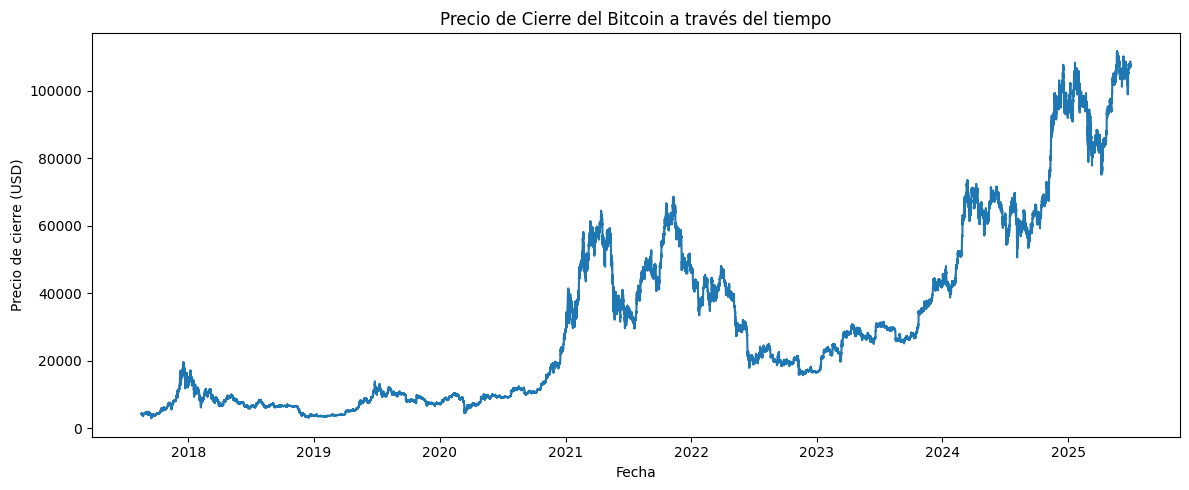

In [117]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_hora, x=df_hora.index, y="close")

plt.title("Precio de Cierre del Bitcoin a través del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (USD)")
plt.tight_layout()
plt.show()